# Exploration

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import mode
from ipywidgets import interact
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
phoible_data = pd.read_csv('phoible_data/phoible-aggregated.tsv', delimiter='\t')
print(phoible_data.columns)
phoible_data.head()

Index(['InventoryID', 'Source', 'LanguageCode', 'LanguageName', 'Glottocode',
       'GlottologName', 'Trump', 'LanguageFamilyRoot', 'LanguageFamilyGenus',
       'Country', 'Area', 'Population', 'Latitude', 'Longitude', 'Phonemes',
       'Consonants', 'Tones', 'Vowels'],
      dtype='object')


,InventoryID,Source,LanguageCode,LanguageName,Glottocode,GlottologName,Trump,LanguageFamilyRoot,LanguageFamilyGenus,Country,Area,Population,Latitude,Longitude,Phonemes,Consonants,Tones,Vowels
0,1,SPA,kor,Korean,kore1280,Korean,1,asis,Korean,"Korea, South",Asia,"42,000,000",37.5000,128.0000,40,22,0,18
1,2,SPA,ket,Ket,kett1243,Ket,1,yeos,Yeniseian,Russian Federation,Europe,190,63.7551,87.5466,32,18,0,14
2,3,SPA,lbe,Lak,lakk1252,Lak,1,ncau,Lak-Dargwa,Russian Federation,Europe,"157,000",42.1328,47.0809,69,60,0,9
3,4,SPA,kbd,Kabardian,kaba1278,Kabardian,1,ncau,Northwest Caucasian,Russian Federation,Europe,"520,000",43.5082,43.3918,56,49,0,7
4,5,SPA,kat,Georgian,nucl1302,Nuclear Georgian,1,kart,Kartvelian,Georgia,Asia,"3,900,000",39.3705,45.8066,35,29,0,6


In [3]:
wals_data = pd.read_csv('wals_data/language.csv')
wals_data.head()

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
0,aab,NaN,NaN,Arapesh (Abu),-3.450000,142.950000,Kombio-Arapesh,Torricelli,NaN,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aar,aiw,aari1239,Aari,6.000000,36.583333,South Omotic,Afro-Asiatic,Africa,ET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aba,aau,abau1245,Abau,-4.000000,141.250000,Upper Sepik,Sepik,Papunesia,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,abb,shu,chad1249,Arabic (Abbéché Chad),13.833333,20.833333,Semitic,Afro-Asiatic,Africa,TD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abd,abi,abid1235,Abidji,5.666667,-4.583333,Kwa,Niger-Congo,Africa,CI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# multiple rows for some of these Language Codes
pd.DataFrame.from_dict(Counter(phoible_data['LanguageCode']), orient='index').reset_index().sort_values(0, ascending=False).head()

,index,0
385,gwn,6
380,sgw,6
998,nyf,6
453,car,5
1169,xtc,5


In [5]:
# same thing as above
phoible_data.groupby(['Source', 'LanguageCode']).count().sort_values('LanguageName', ascending=False).head(10)

InventoryID  LanguageName  Glottocode  GlottologName  \
Source LanguageCode                                                         
GM     sgw                     6             6           6              6   
       gwn                     6             6           6              6   
       nyf                     6             6           6              6   
       bva                     4             4           4              4   
       ndo                     4             4           4              4   
SAPHON wca                     3             3           3              3   
       cas                     3             3           3              3   
GM     lmp                     3             3           3              3   
       xtc                     3             3           3              3   
SAPHON qvn                     3             3           3              3   

                     Trump  LanguageFamilyRoot  LanguageFamilyGenus  Country  \
Source LanguageCode                                                            
GM     sgw               6                   6                    6        6   
       gwn               6                   6                    6        6   
       nyf               6                   6                    6        6   
       bva               4                   4                    4        4   
       ndo               4                   4                    4        4   
SAPHON wca               3                   3                    3        3   
       cas               3                   3                    3        3   
GM     lmp               3                   3                    3        3   
       xtc               3                   3                    3        3   
SAPHON qvn               3                   3                    3        3   

                     Area  Population  Latitude  Longitude  Phonemes  \
Source LanguageCode                                                    
GM     sgw              6           6         6          6         6   
       gwn              6           6         6          6         6   
       nyf              6           6         6          6         6   
       bva              4           4         4          4         4   
       ndo              4           4         4          4         4   
SAPHON wca              3           3         3          3         3   
       cas              3           3         3          3         3   
GM     lmp              3           3         3          3         3   
       xtc              3           3         3          3         3   
SAPHON qvn              3           3         3          3         3   

                     Consonants  Tones  Vowels  
Source LanguageCode                             
GM     sgw                    6      6       6  
       gwn                    6      6       6  
       nyf                    6      6       6  
       bva                    4      4       4  
       ndo                    4      4       4  
SAPHON wca                    3      3       3  
       cas                    3      3       3  
GM     lmp                    3      3       3  
       xtc                    3      3       3  
SAPHON qvn                    3      3       3

In [6]:
# same language code, but different language name? What is `Trump`?
cond = np.logical_and(phoible_data['Source'] == 'GM', phoible_data['LanguageCode'] == 'sgw')
phoible_data[cond]

,InventoryID,Source,LanguageCode,LanguageName,Glottocode,GlottologName,Trump,LanguageFamilyRoot,LanguageFamilyGenus,Country,Area,Population,Latitude,Longitude,Phonemes,Consonants,Tones,Vowels
1458,1459,GM,sgw,Muher,seba1251,Sebat Bet Gurage,1,afas,Semitic,Ethiopia,Africa,"2,320,000",8.11879,37.9891,42,34,0,8
1459,1460,GM,sgw,Ezha,seba1251,Sebat Bet Gurage,2,afas,Semitic,Ethiopia,Africa,"2,320,000",8.11879,37.9891,39,33,0,6
1460,1461,GM,sgw,Chaha,seba1251,Sebat Bet Gurage,3,afas,Semitic,Ethiopia,Africa,"2,320,000",8.11879,37.9891,44,36,0,8
1461,1462,GM,sgw,Gumer,seba1251,Sebat Bet Gurage,4,afas,Semitic,Ethiopia,Africa,"2,320,000",8.11879,37.9891,42,35,0,7
1462,1463,GM,sgw,Gura,seba1251,Sebat Bet Gurage,5,afas,Semitic,Ethiopia,Africa,"2,320,000",8.11879,37.9891,42,36,0,6
1463,1464,GM,sgw,Gyeto,seba1251,Sebat Bet Gurage,6,afas,Semitic,Ethiopia,Africa,"2,320,000",8.11879,37.9891,45,39,0,6


# Start of Assignment

## Background

One big question in cognitive science is the relationship between linguistic features (e.g. number of vowels, word order and number of tense categories) and non-linguistic features (e.g. population size, altitude and climate). In particular, a lot of attention has been paid to the relationship between population size and various linguistic features. People have looked at the relationship between population size and:

- size of the phoneme inventory

- morphological complexity

- Relationship between population size and phonemic inventory

Phonemes are individual sounds. They come from the IPA, which is the phonetic alphabet. Phonemes can either be consonants or vowels. Languages have a fixed number of phonemes. The best data source for this is PHOIBLE. 
Visualize the following univariate distributions both as a histogram and on a map:
- Number of consonants

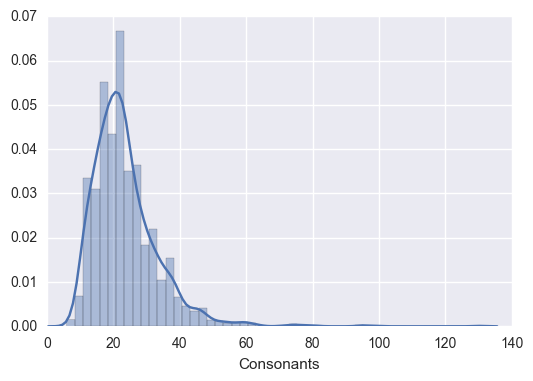

In [7]:
sns.distplot(phoible_data['Consonants'])

- Number of vowels

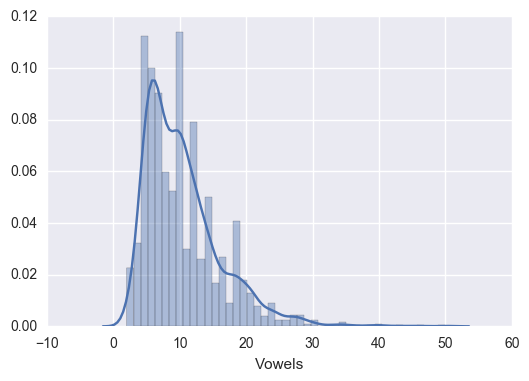

In [8]:
sns.distplot(phoible_data['Vowels'])

- Number of phonemes

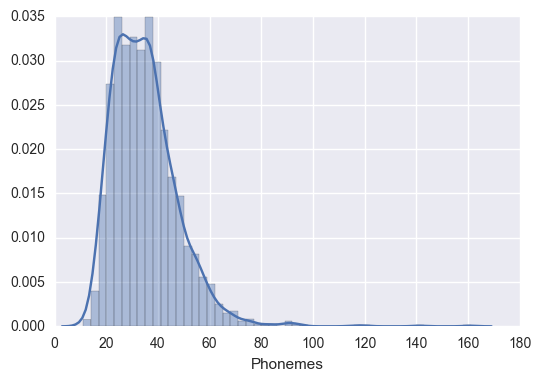

In [9]:
sns.distplot(phoible_data['Phonemes'])

In [15]:
#Recreated for convenience and Converted Population column to numerical values
#phoib now only has rows who's population column value was a number

phoible_data["Population"] = [x.replace(",","") for x in phoible_data["Population"]]
phoib = phoible_data[phoible_data["Population"].apply(lambda x: str(x).isdigit())]
phoib["Population"] = [int(i) for i in phoib["Population"]]
phoib.head()

,InventoryID,Source,LanguageCode,LanguageName,Glottocode,GlottologName,Trump,LanguageFamilyRoot,LanguageFamilyGenus,Country,Area,Population,Latitude,Longitude,Phonemes,Consonants,Tones,Vowels
0,1,SPA,kor,Korean,kore1280,Korean,1,asis,Korean,"Korea, South",Asia,42000000,37.5000,128.0000,40,22,0,18
1,2,SPA,ket,Ket,kett1243,Ket,1,yeos,Yeniseian,Russian Federation,Europe,190,63.7551,87.5466,32,18,0,14
2,3,SPA,lbe,Lak,lakk1252,Lak,1,ncau,Lak-Dargwa,Russian Federation,Europe,157000,42.1328,47.0809,69,60,0,9
3,4,SPA,kbd,Kabardian,kaba1278,Kabardian,1,ncau,Northwest Caucasian,Russian Federation,Europe,520000,43.5082,43.3918,56,49,0,7
4,5,SPA,kat,Georgian,nucl1302,Nuclear Georgian,1,kart,Kartvelian,Georgia,Asia,3900000,39.3705,45.8066,35,29,0,6


Visualize those same distributions grouped by continent and grouped by genetic affiliation. The continent is called `area` in PHOIBLE. The genetic affiliation is called `Family` in WALS. WALS and PHOIBLE both identify languages with ISO 639-3, so you should be able to match them up. 

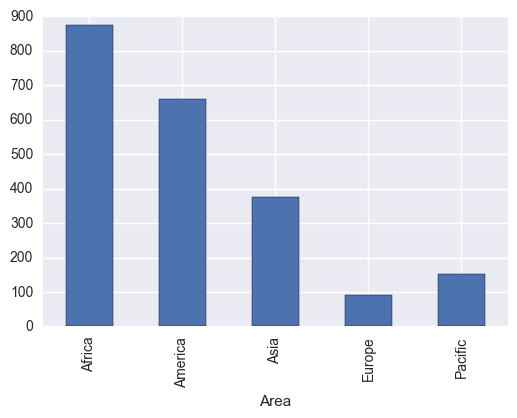

In [11]:
#By Continent
phoible_data.groupby(by = "Area").size().plot.bar()

You could try looking at number of phonemes plotted against latitude/longitude, but I doubt anything will come of it.

Visualize the relationship between number of consontants and number of vowels, again by all language, by continent and by genetic affiliation.

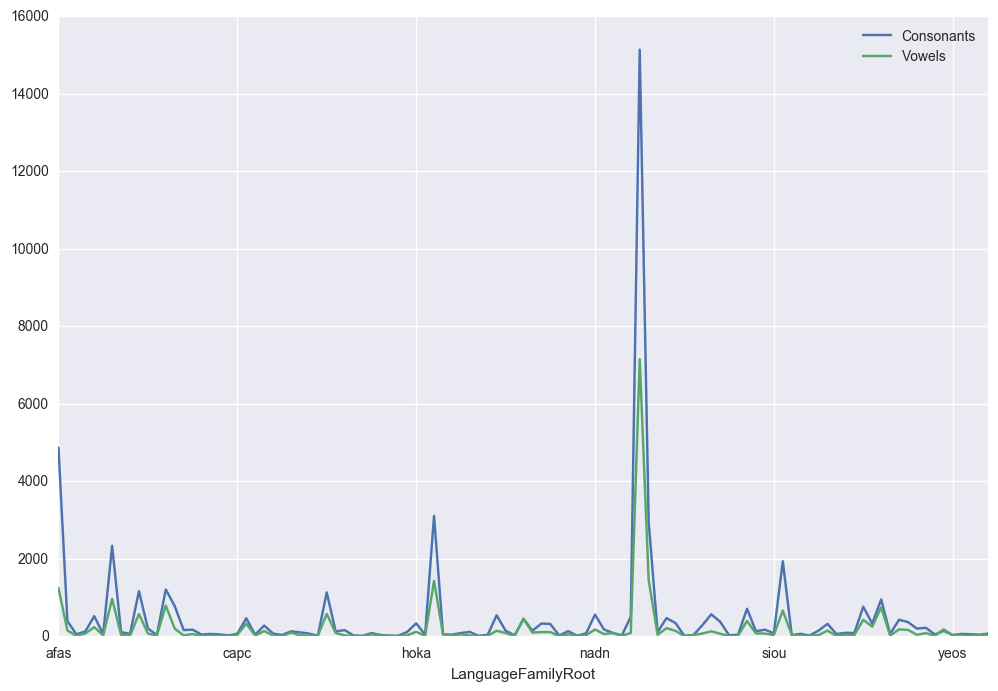

In [12]:
#By Language
pho_lang = phoible_data.loc[:,["LanguageFamilyRoot","Consonants", "Vowels"]]
pho_lang = pho_lang.groupby(by = "LanguageFamilyRoot").sum()
pho_lang = pho_lang.drop("UNCLASSIFIED")
pho_lang.plot(figsize = (12,8))

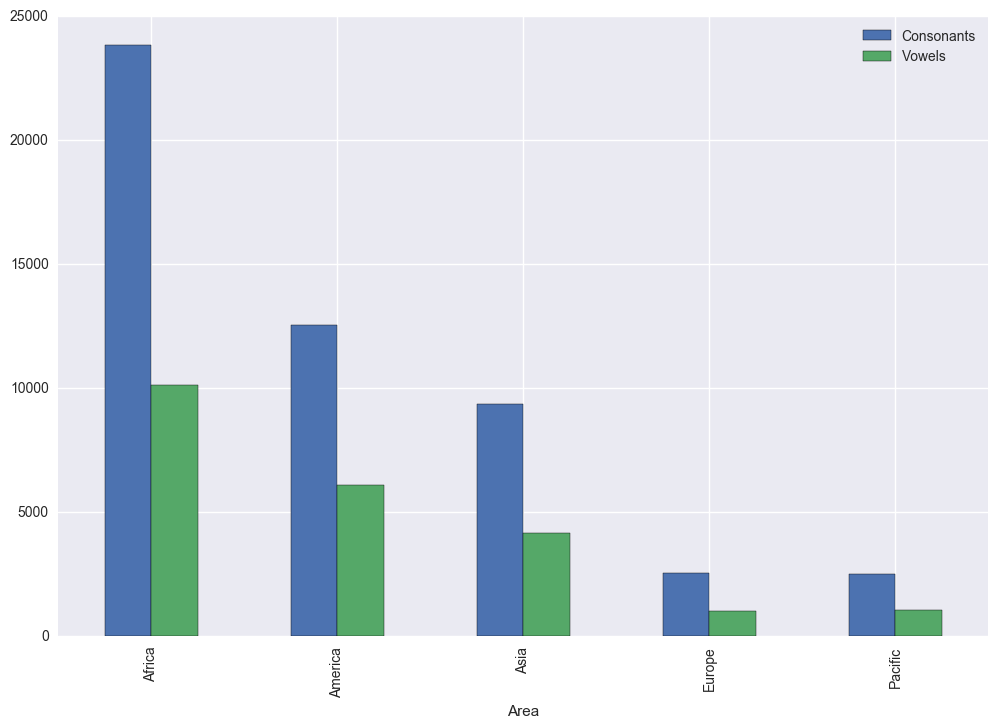

In [13]:
#By Continent
pho_cont = phoible_data.loc[:,["Area","Consonants", "Vowels"]]
pho_cont = pho_cont.groupby(by = "Area").sum()
pho_cont.plot.bar(figsize = (12,8))

In [17]:
#By Genetic Affiliation NEED TO COMBINE WITH WALS

Visualize the relationship between population size and phoneme inventory size, again by all language, by continent and by genetic affiliation.

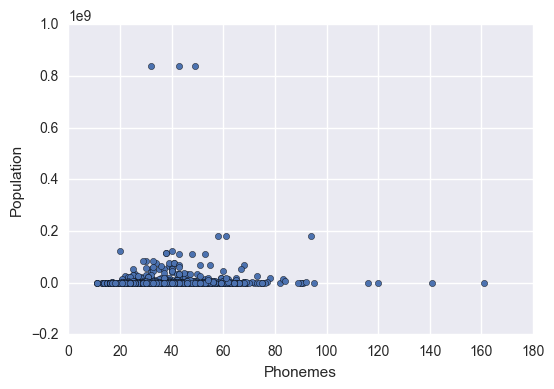

In [19]:
#By Language STILL NEEDS WORK, In Progress - SHUBHAM
pho_pop_lang = phoib.loc[:,["LanguageFamilyRoot","Population", "Phonemes"]]
pho_pop_lang = pho_pop_lang[pho_pop_lang["Population"].apply(lambda x: str(x).isdigit())]
pop = pho_pop_lang.groupby(by = "LanguageFamilyRoot").sum()
pop = pho_pop_lang[pho_pop_lang["LanguageFamilyRoot"] != "UNCLASSIFIED"]
pop.plot.scatter(x = "Phonemes", y = "Population")

Someone has claimed that phoneme inventory size and distance from Africa are inversely related. You could use the latitude/longitude in PHOIBLE for this. You may have to arbitrarily choose the mid-point of Africa for this.

,Population,Phonemes
Area,,
Africa,819454490,35493
America,41731283,17294
Asia,5986020125,13631
Europe,933195940,3568
Pacific,1591955,3490


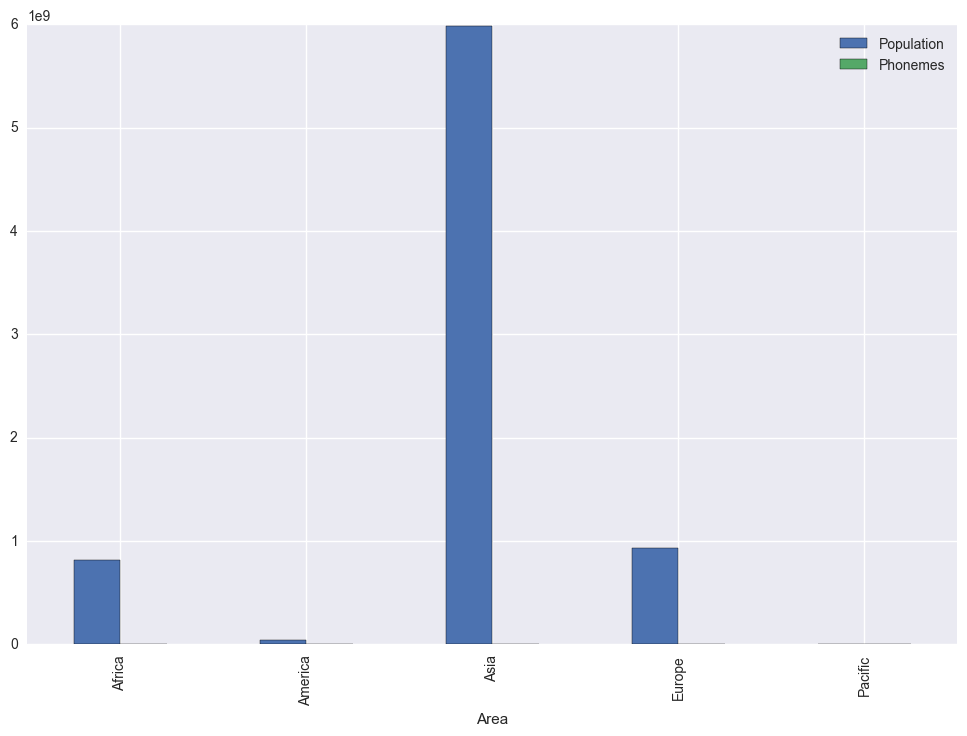

In [18]:
#By Continent STILL NEEDS WORK, IN Progress - SHUBHAM
pho_pop_cont = phoib.loc[:,["Area","Population", "Phonemes"]]
pho_pop_cont = pho_pop_cont.groupby(by = "Area").sum()
pho_pop_cont.plot.bar(figsize = (12,8))
pho_pop_cont

What are the most common phonemes in the world? What is the distribution of frequency? That is, there are about 2,000 phonemes in PHOIBLE, but only a handful are common and there's a long tail. One problem here is that PHOIBLE is not a random sample of languages. So, you could sample languages from PHOIBLE proportional to their population size and arrive at an estimate that way.

Phonemes can be described by a set of (mostly) binary features. PHOIBLE has this data too. Is the distribution of featue values evenly split for each feature? If not, which features are more prone to being either 0 or 1?
Are some phonemes only present in some area of genetic affiliation? (There should be. For example, 'kp' and 'gb' are likely only in Africa.)

One of the features of phonemes is tone. If a language has a phoneme with tone, it counts as a "tone language". Are most language tone? Where are the tone langauges on the map?

Someone has claimed there is a relationship being a tone language and the altitude. You could use lat/long to call some API to get the altitude and see if there's a relationship.

## Relationship between population size and morphological complexity

All the data for this will be in WALS. Morphological complexity is a vague term, referring to how complicated the words in a language are. Here are some features that you should look at with respect to their relation to phoneme inventory size:
- Feature 30A: Number of Genders
- Feature 27A: Reduplication
- Feature 20A: Fusion of Selected Inflectional Formatives
- Feature 21A: Exponence of Selected Inflectional Formatives
- Feature 21B: Exponence of Tense-Aspect-Mood Inflection